In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('data/Grade_Set_1_Classification.csv')
df

,Hours_Studied,Result
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1
5,7,1
6,8,1
7,9,1
8,10,1


In [5]:
x= df.Hours_Studied.values.reshape(-1,1) # independent variable
y= df.Result                       # dependent variable 

In [6]:
# Create linear regression object
lr = lm.LinearRegression()
# Train the model using the training sets
lr.fit(x, y)

LinearRegression()

Text(0.5, 0, 'Hours_Studied')

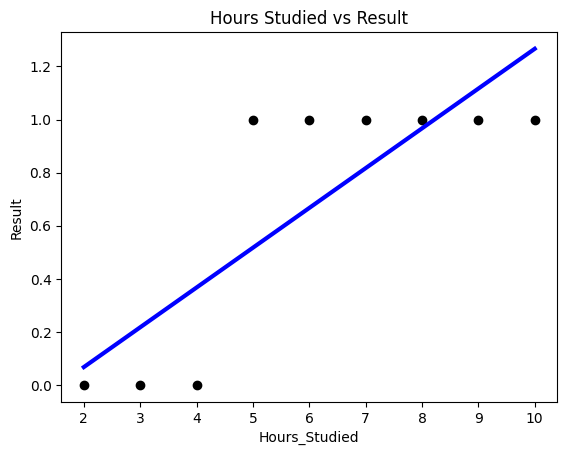

In [7]:
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')

In [8]:
# add predict value to the data frame
df['Result_Pred'] = lr.predict(x)

# Using built-in function
print ("R Squared : ", r2_score(df.Result, df.Result_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Result, df.Result_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Result, df.Result_Pred)))

R Squared :  0.675
Mean Absolute Error:  0.2296296296296296
Root Mean Squared Error:  0.26874192494328497


The outcome that we are expecting is either 1 or 0, the issue with linear regression is that it can give values large than 1 or less than 0. In the above plot we can see that linear regression is not able to draw boundries to classify observations.

The solution to this is to introduce sigmoid or ligit function (which takes a S shape) to the regression equatoin. The fundamental idea here is the hypothesis will use the linear approximation, then map with logistic function for binary prediction.

linear regression equation in this case is y = mx + c

Logistic regression can be explained better in odds ration. The odds of an event occuring are defined as the probability of an event occuring divided by the probability of that event not occuring.

odds ratio of pass vs fail = probability(y=1) / 1-probability(y=1)

A logit is the log base e (log) of the odds, so using logit model:

log(p / p(1 - p)) = mx + c

p = 1 / 1 + e^-(mx + c)

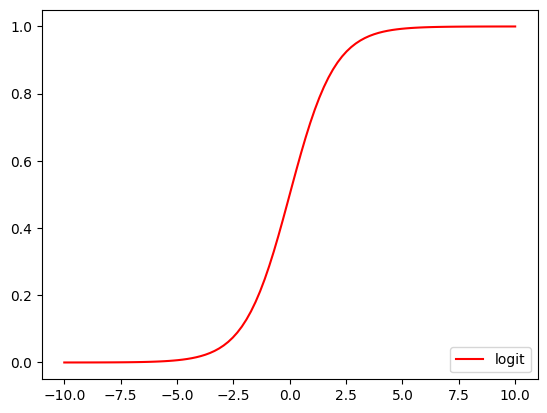

In [9]:
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

In [19]:
from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']

x = df[independent_variables]       # independent variable
y = df['Result']                      # dependent variable 

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)
# check the accuracy on the training set
model.score(x, y)

1.0

In [20]:
# predict_proba will return array containing proability of y = 0 and y = 1
model.predict_proba(x)[:,1]

array([0.05368062, 0.15313611, 0.36565616, 0.64757973, 0.85417548,
       0.94916743, 0.98347736, 0.99475738, 0.99834945])

In [21]:
# predict will give convert the probability(y=1) values > .5 to 1 else 0  
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1])

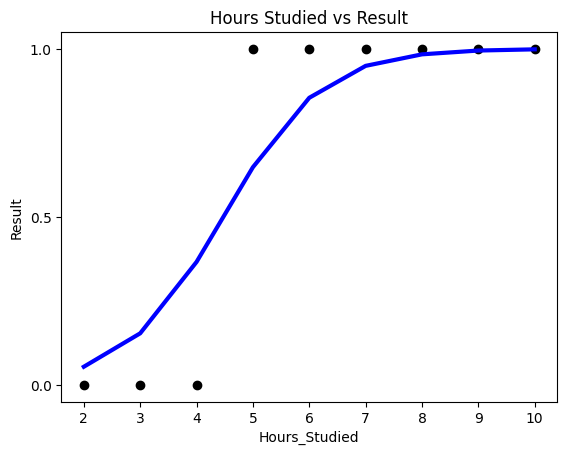

In [22]:
# plotting fitted line
plt.scatter(df.Hours_Studied, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

In [24]:
from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))

Accuracy : 1.0


In [25]:
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

AUC : 1.0


In [26]:
print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))

Confusion matrix : [[3 0]
 [0 6]]


In [27]:
print ("classification report :", metrics.classification_report(y, model.predict(x)))

classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



***Plot ROC curve***

In [29]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])
 
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 1.00


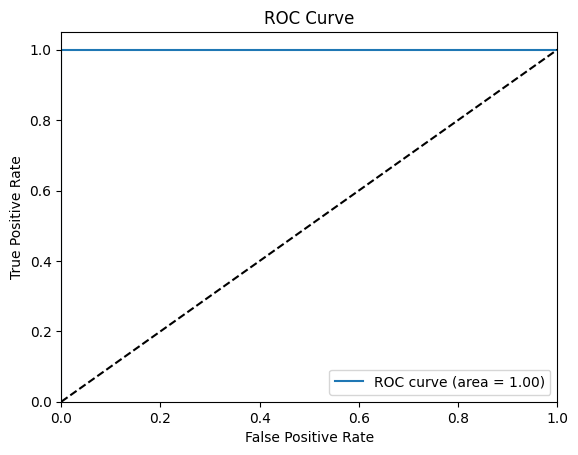

In [30]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

***Inverse of regularization (C is float, default value is 1) is one of the key aspect of fitting logistic regression line.***

In [31]:
# instantiate a logistic regression model with default c value, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

In [32]:
# check the accuracy on the training set
print ("C = 1 (default), Accuracy :", metrics.accuracy_score(y, model.predict(x)))

C = 1 (default), Accuracy : 1.0


In [33]:
# instantiate a logistic regression model with c = 10, and fit with X and y
model1 = LogisticRegression(C=10)
model1 = model1.fit(x, y)

In [34]:
# check the accuracy on the training set
print ("C = 10, Accuracy :", metrics.accuracy_score(y, model1.predict(x)))

C = 10, Accuracy : 1.0


In [35]:
# instantiate a logistic regression model with c = 100, and fit with X and y
model2 = LogisticRegression(C=100)
model2 = model2.fit(x, y)

In [36]:
# check the accuracy on the training set
print ("C = 100, Accuracy :", metrics.accuracy_score(y, model2.predict(x)))

C = 100, Accuracy : 1.0


In [37]:
# instantiate a logistic regression model with c = 1000, and fit with X and y
model3 = LogisticRegression(C=1000)
model3 = model3.fit(x, y)

In [38]:
# check the accuracy on the training set
print ("C = 1000, Accuracy :", metrics.accuracy_score(y, model3.predict(x)))

C = 1000, Accuracy : 1.0


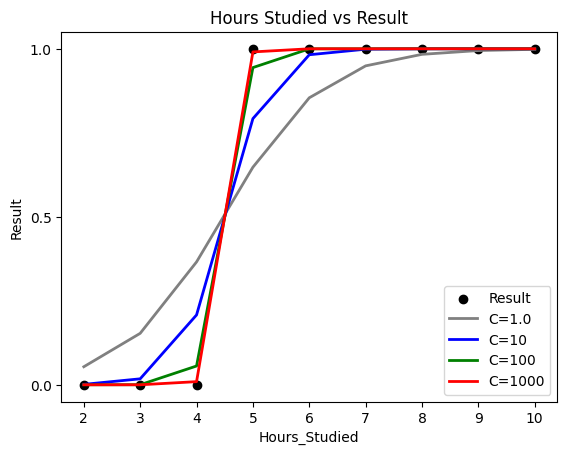

In [39]:
# plotting fitted line
plt.scatter(df.Hours_Studied, y,  color='black', label='Result')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='gray', linewidth=2, label='C=1.0')
plt.plot(df.Hours_Studied, model1.predict_proba(x)[:,1], color='blue', linewidth=2,label='C=10')
plt.plot(df.Hours_Studied, model2.predict_proba(x)[:,1], color='green', linewidth=2,label='C=100')
plt.plot(df.Hours_Studied, model3.predict_proba(x)[:,1], color='red', linewidth=2,label='C=1000')
plt.legend(loc='lower right') # legend location
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()